<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/RNN-Basics/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_excel('/content/NPA Accounts.xlsx')

In [45]:
data.mean()

,0
Date,2024-12-13 08:01:53.385826816
Accounts,51980.718504


In [3]:
data.head()

,Date,Accounts
0,2023-03-31,9731
1,2024-01-31,16130
2,2024-02-01,16186
3,2024-02-02,16235
4,2024-02-05,16369


In [4]:
values = data['Accounts'].values.reshape(-1,1)

In [5]:
values.shape

(508, 1)

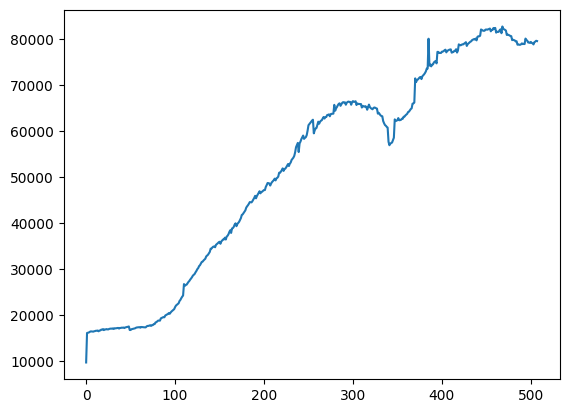

In [6]:
plt.plot(values)
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled = scaler.fit_transform(values)

In [8]:
window = 7

def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled, window)

X = X.reshape((X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (501, 7, 1)
y shape: (501, 1)


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_size = int(len(X) * 0.6)
x_train, x_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [11]:
model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0876 - mean_absolute_error: 0.2322 - val_loss: 0.0175 - val_mean_absolute_error: 0.1215
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0112 - mean_absolute_error: 0.0813 - val_loss: 0.0271 - val_mean_absolute_error: 0.1439
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0056 - mean_absolute_error: 0.0623 - val_loss: 0.0205 - val_mean_absolute_error: 0.1253
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035 - mean_absolute_error: 0.0473 - val_loss: 0.0201 - val_mean_absolute_error: 0.1221
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0027 - mean_absolute_error: 0.0437 - val_loss: 0.0146 - val_mean_absolute_error: 0.1059
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018 - mean_absolute_error: 0.0360 - val_loss: 0.0121 - val_mean_absolute_error: 0.0962
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0017 - mean_absolute_error: 0.0344 - v

In [12]:
y_pred_scaled = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


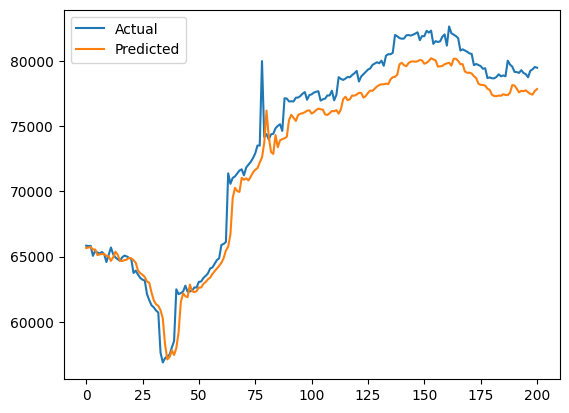

In [13]:
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [14]:
print(mean_squared_error(y_pred, y_test_actual))
print(mean_absolute_error(y_pred, y_test_actual))

2731363.802955664
1351.5189093594522


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


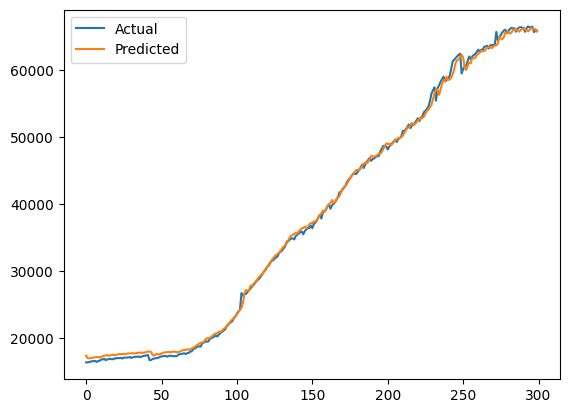

In [15]:
y_train_pred_scaled = model.predict(x_train)
y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
y_train_actual = scaler.inverse_transform(y_train)
plt.plot(y_train_actual, label='Actual')
plt.plot(y_train_pred, label='Predicted')
plt.legend()
plt.show()

In [37]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(200, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer= tf.keras.optimizers.Adam(),
                   loss = tf.keras.losses.MeanSquaredError(),
                   metrics = [tf.keras.metrics.MeanAbsoluteError()])

In [42]:
lstm_model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.6027e-04 - mean_absolute_error: 0.0084 - val_loss: 0.0011 - val_mean_absolute_error: 0.0229
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8827e-04 - mean_absolute_error: 0.0091 - val_loss: 9.5559e-04 - val_mean_absolute_error: 0.0201
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.9704e-04 - mean_absolute_error: 0.0095 - val_loss: 0.0013 - val_mean_absolute_error: 0.0269
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8078e-04 - mean_absolute_error: 0.0092 - val_loss: 0.0011 - val_mean_absolute_error: 0.0242
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.7802e-04 - mean_absolute_error: 0.0089 - val_loss: 9.5810e-04 - val_mean_absolute_error: 0.0202
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.7016e-04 - mean_absolute_error: 0.0089 - val_loss: 0.0021 - val_mean_absolute_error: 0.0374
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8828e-

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


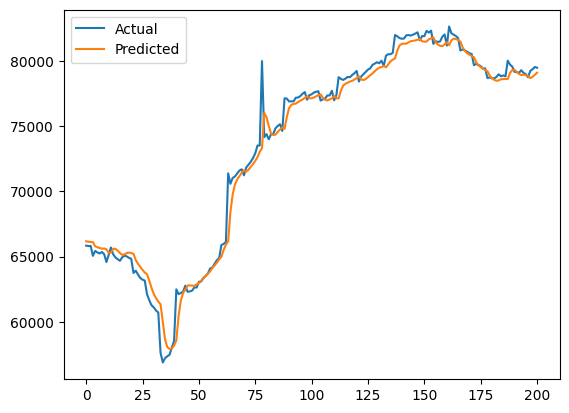

956774.5567825093
596.0222131529849


In [43]:
lstm_y_pred_scaled = lstm_model.predict(x_test)
lstm_y_pred = scaler.inverse_transform(lstm_y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

plt.plot(y_test_actual, label='Actual')
plt.plot(lstm_y_pred, label='Predicted')
plt.legend()
plt.show()

print(mean_squared_error(lstm_y_pred, y_test_actual))
print(mean_absolute_error(lstm_y_pred, y_test_actual))

In [46]:
# Directional Accuracy (Sign Accuracy)
actual_diff = np.diff(y_test_actual.flatten())
pred_diff = np.diff(lstm_y_pred.flatten())

actual_dir = np.sign(actual_diff)
pred_dir = np.sign(pred_diff)

direction_accuracy = np.mean(actual_dir == pred_dir)
print(f"Directional Accuracy: {direction_accuracy * 100:.2f}%")

Directional Accuracy: 58.50%


In [40]:
last_seq = X[-1].reshape(1, window, 1)

In [18]:
last_seq.shape

(1, 7, 1)

In [19]:
pred_scaled = model.predict(last_seq)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [20]:
pred = scaler.inverse_transform(pred_scaled)

In [21]:
pred

array([[77856.29]], dtype=float32)

In [22]:
new_seq = np.append(last_seq[:,1:,:], [[pred_scaled[0]]], axis=1)

In [23]:
last_seq

array([[[0.90806741],
        [0.90222564],
        [0.89975728],
        [0.89320242],
        [0.90655897],
        [0.90990497],
        [0.91481426]]])

In [24]:
new_seq

array([[[0.90222564],
        [0.89975728],
        [0.89320242],
        [0.90655897],
        [0.90990497],
        [0.91481426],
        [0.86841702]]])

In [25]:
pred_scaled_2 = model.predict(new_seq)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [26]:
next_pred = scaler.inverse_transform(pred_scaled_2)

In [27]:
next_pred

array([[77665.94]], dtype=float32)